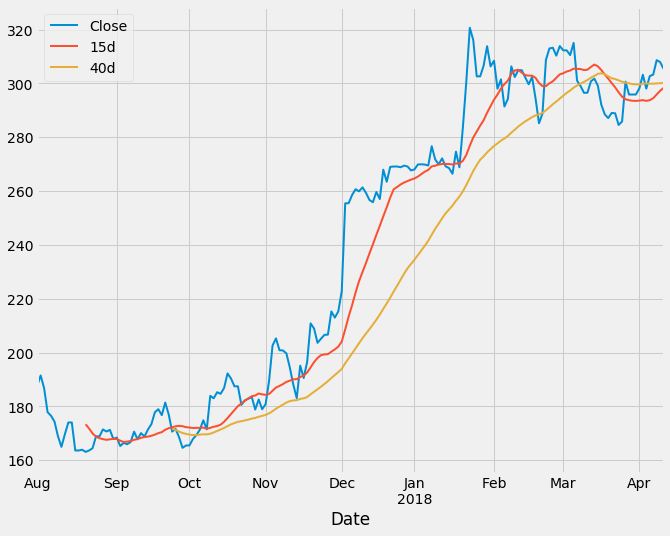

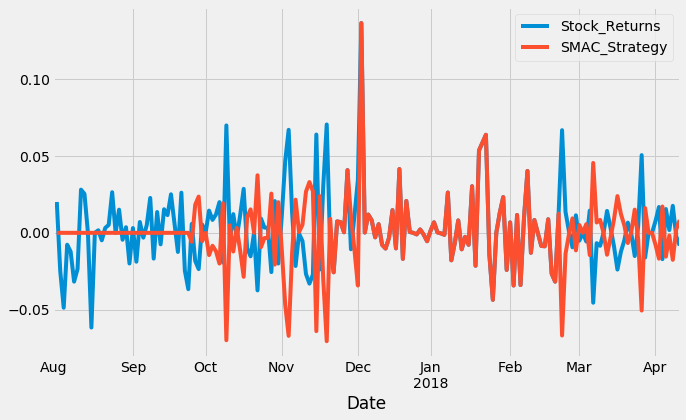

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
from matplotlib import style
style.use('fivethirtyeight')


data=quandl.get('XNSE/BIOCON',trim_start='2017-08-01',trim_end='2018-04-11', api_key = '_dXt_dusPmExx-BsoYPH')

data['15d']=np.round(data['Close'].rolling(window=15).mean(),2)
data['40d']=np.round(data['Close'].rolling(window=40).mean(),2)

data[['Close','15d','40d']].plot(lw=2, grid=True,figsize=(10,8))

data['15d-40d']=data['15d']-data['40d']
X=10
data['Stance']=np.where(data['15d-40d']>X,1,0)
data['Stance']=np.where(data['15d-40d']<X,-1,data['Stance'])
data['Stance'].value_counts()
#data['Stance'].plot(lw=2,ylim=[-1.1,1.1])
data['Stock_Returns']=np.log(data['Close']/data['Close'].shift(1))
data['SMAC_Strategy']=data['Stock_Returns']*data['Stance'].shift(1)
data[['Stock_Returns','SMAC_Strategy']].plot(grid=True,figsize=(10,6))


plt.show()